In [2]:
import numpy as np
import json
import pandas as pd
import os
import pdb
import math
from numpy.linalg import inv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation
from tempfile import NamedTemporaryFile
import math
import json as simplejson
import cv2 
import subprocess
%matplotlib inline

In [3]:
#create image view:

In [4]:
##This function generates the bounding boxes in each frame (imagine view). This function takes on two arguments: game code and clip in the composite json file. 

def bb_video(game_code, clip):
    scale=2.
    gtflag = 1
## README!! Make sure to change the directory of the path on your computer
    jsonfile = '/Users/likai/Desktop/Xdata/composite_jsons/{}/clip_{}.json'.format(game_code,clip)
# create corresponding folders
## README!! Make sure to change the directory of the path on your computer
    final_directory = os.path.join('/Users/likai/Desktop/Xdata/frames_box/{:s}'.format(game_code), 'clip_{:s}'.format(clip))
    if not os.path.exists(final_directory):
        os.makedirs(final_directory)
## read the json file
    with open(jsonfile, 'r') as f:
        game_data = json.load(f)
## create bounding boxes        
    for i in range(game_data['event_frames']['start'],game_data['event_frames']['end']+1): 
## README!! Make sure to change the directory of the path on your computer
        imfile = '/Users/likai/Desktop/Xdata/extracted_frames/{:s}/clip_{:s}/{:04d}.jpg'.format(game_code,clip,i)
        fig2 = plt.figure(figsize=(15,10))
        bgr_img = cv2.imread(imfile)
        rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        colors = [(0,0,0),(255,255,255),(255,0,0),(255,255,0)]

        for k,color in zip(game_data['tracks'].keys(),colors):
            for tr in game_data['tracks'][k]:
                if not tr['outside'][i-1]:
                    cv2.rectangle(rgb_img,(tr['xmin'][i-1],tr['ymin'][i-1]),(tr['xmax'][i-1],tr['ymax'][i-1]),color,3)
## save images to corresponding files 
## README!! Make sure to change the directory of the path on your computer  
        cv2.imwrite(os.path.join('/Users/likai/Desktop/Xdata/frames_box/{:s}/clip_{:s}'.format(game_code,clip), '{:04d}.jpg'.format(i)),cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR))
    if os.path.exists('/Users/likai/Desktop/Xdata/frames_box/{:s}/clip_{:s}'.format(game_code,clip)):
# #produce a video based on the images with bounding boxes
## README!! Make sure to change the directory of the path on your computer
        subprocess.call(["ffmpeg","-y","-r",str(20),"-i", "/Users/likai/Desktop/Xdata/frames_box/{:s}/clip_{:s}/%04d.jpg".format(game_code,clip),"-vcodec","mpeg4", "-qscale","5", "-r", str(20), "/Users/likai/Desktop/Xdata/frames_box/{:s}/clip_{:s}.mp4".format(game_code,clip)])
#delete images with bounding boxes
## README!! Make sure to change the directory of the path on your computer
        dirPath = '/Users/likai/Desktop/Xdata/frames_box/{:s}/clip_{:s}'.format(game_code,clip)
        for file in os.listdir(dirPath):
            os.remove(dirPath+"/"+file);

In [5]:
## README: The whole cell is to draw the background for the overhead view (a pool with two cages and meter lines, red and yellow)
## Make sure you run this cell before you run the overhead view function below
## Nothing needs to be changed


VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)


from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

def draw_pool(ax=None, color='black', lw=2, outer_lines=False):
    #scale = 10
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
        
    ax.add_patch(
    patches.Rectangle(
            (-12.5,-10),   # (x,y)
            25,          # width
            20,          # height
            facecolor='#4dc9eb',#'#80D2F5', 
            edgecolor='k',
            linewidth=2
        )
    )
    # marker lines
    #r_goal_line = plt.Line2D((25-12.5,25-12.5),(0-10,20-10),lw=2.5,color='w')
    r_twom_line = plt.Line2D((23-12.5,23-12.5),(0-10,20-10),lw=2.25,color='#EF5A48')#color='#FF9696')
    r_fivem_line = plt.Line2D((20-12.5,20-12.5),(0-10,20-10),lw=2.5,color='#FFF697')#'#FFFF96')
    #plt.gca().add_line(r_goal_line)
    plt.gca().add_line(r_twom_line)
    plt.gca().add_line(r_fivem_line)

    #l_goal_line = plt.Line2D((0-12.5,0-12.5),(0-10,20-10),lw=2.5,color='w')
    l_twom_line = plt.Line2D((2-12.5,2-12.5),(0-10,20-10),lw=2.25,color='#EF5A48')
    l_fivem_line = plt.Line2D((5-12.5,5-12.5),(0-10,20-10),lw=2.5,color='#FFF697')
    #plt.gca().add_line(l_goal_line)
    plt.gca().add_line(l_twom_line)
    plt.gca().add_line(l_fivem_line)

    # l cage
    ax.add_patch(
        patches.Rectangle(
            (-1-12.5,10-1.5-10),   # (x,y)
            1,          # width
            3,          # height
            facecolor='w',
            edgecolor='k',
            linewidth=2,
            hatch='xxx'
        )
    )

    # r cage
    ax.add_patch(
        patches.Rectangle(
            (25-12.5,10-1.5-10),   # (x,y)
            1,          # width
            3,          # height
            facecolor='w',
            edgecolor='k',
            linewidth=2,
            hatch='xxx'
        )
    )

    plt.axis([-1-12.5, 26-12.5, 20-10, 0-10])
    plt.axis('off')
    
    return ax
    
    


In [6]:
## create overhead view:
##README: This function generates the overhead view in each frame. 
##This function takes on two arguments: game code and clip in the composite json file. 


In [7]:
def ov_video(game_code,clip):
    scale=2.
    gtflag = 1
## README!! Make sure to change the directory of the path on your computer
    jsonfile = '/Users/likai/Desktop/Xdata/composite_jsons/{}/clip_{}.json'.format(game_code,clip)
    with open(jsonfile, 'r') as f:
        game_data = json.load(f)

    fig = plt.figure(figsize=(25/scale,20/scale))
    ax = plt.axes(xlim=(-1-12.5,26-12.5), ylim=(20-10,0-10))
    ax = draw_pool(outer_lines=True)

    scat_ball = ax.scatter([], [],zorder=95,marker='o')
    scat_goalie = ax.scatter([], [],zorder=94,marker='o')
    scat_home = ax.scatter([], [],zorder=94,marker='o')
    scat_away = ax.scatter([], [],zorder=94,marker='o')
    facecol_home = []
    facecol_away = []

    facecol_ball = []
    facecol_goalie = []
    edgecol_home = []
    edgecol_away = []
    edgecol_ball = []
    edgecol_goalie = []
    lw_home = []
    lw_away = []
    lw_ball = []
    lw_goalie = []
    lw_set = [lw_home, lw_away, lw_ball, lw_goalie]
    scat_set = [scat_home, scat_away, scat_ball, scat_goalie]
    facecol_set = [facecol_home, facecol_away, facecol_ball, facecol_goalie]
    edgecol_set = [edgecol_home, edgecol_away, edgecol_ball, edgecol_goalie]


    # After creating plot ...
    alpha = 0.75
    # ax.axes.get_xaxis().set_visible(False)
    # ax.axes.get_yaxis().set_visible(False)
    darkorchid = [153/255., 50/255., 204/255.,alpha] #'#9932CC'
    tomato = [255/255., 99/255., 71/255.,alpha] #'#FF6347'
    darkturquoise = [0,206/255.,209/255.,alpha] #'#00CED1'
    mediumseagreen = [60/255., 179/255., 113/255.,alpha] #'#3CB371'
    dodgerblue = [30/255., 144/255., 255/255.,alpha] #'#1E90FF'
    cornflowerblue = [100/255.,149/255.,237/255.,alpha]
    white = [1.,1.,1.,alpha]
    dark = [0.25,0.25,0.25,alpha]
    red = tomato#[0.25,0.25,0.25,alpha]
    yellow = [255/255.,255/255.,0/255.,alpha]
    colorc = [dark,white,yellow,red]


# initialization function: plot the background of each frame
    def init():
        scat_ball.set_offsets([])
        scat_goalie.set_offsets([])
        scat_away.set_offsets([])
        scat_home.set_offsets([])

        return scat_home,scat_away,scat_ball,scat_goalie, #scat_goalie, scat_ball, scat_away,

# animation function.  This is called sequentially
    def animate(i):
        #print(i)
        ps = 200
        if gtflag:
            for k,c,s,f,e,l in zip(game_data['tracks'].keys(),colorc,scat_set, facecol_set, edgecol_set,lw_set):
                x_temp = []; y_temp = []
                for tr in game_data['tracks'][k]:
                    if not tr['outside'][i]:
                        x_temp.append(tr['x_ov'][i]); y_temp.append(tr['y_ov'][i])
                        xy_temp = [[x,y] for (x,y) in zip(x_temp,y_temp)]
                        s.set_offsets(np.array(xy_temp))
                        f = np.array([c]*len(x_temp))
                        e = np.array([[0,0,0,1]]*len(x_temp))
                        l = np.array([2]*len(x_temp))
                        s.set_edgecolors(e)
                        s.set_facecolors(f)
                        s.set_linewidths(l)
                        s.set_sizes(np.array([ps]*len(x_temp)))
                    else:
                        s.set_offsets(np.array([[-500,-500]]))



        fig.suptitle(i)

        return scat_home,scat_away,scat_ball,scat_goalie,

# call the animator.  blit=True means only re-draw the parts that have changed.
## TODO: frames=range(.,.) sets the start and end frame for the animation. Right now, it's going through the shots, but you can change this to be
## whatever frame range you want.
    anim = animation.FuncAnimation(fig, animate, init_func=init,frames=range(game_data['event_frames']['start'],game_data['event_frames']['end']+1), interval=1, blit=True)

## TODO: change this save path.
    shotdir = '/Users/likai/Desktop/Xdata/shot_overhead_clips/{:s}'.format(game_code)
    if not os.path.exists(shotdir):
       os.mkdir(shotdir)
    anim.save('{}/{}_{}.mp4'.format(shotdir,game_code,clip), fps=20)#,bbox_inches='tight')

# call our new function to display the animation，you can choose to display the animation 
#   display_animation(anim)

In [ ]:
## README: The function below is the only function you need to call,
##but make sure to run all of the cells above in order to make it function.
##This function takes on three arguments:game_code, clip, option. You have 3 choices 
##for the option argument: 'im'(produce image view videos), 'ov'(produce image view videos)
## and 'both'(produces videos with overhead and image views in a screen)
##Make sure you change all of the directories before you run

In [8]:
def fun(game_code, clip, option):

# produce image view videos
    if option == 'im':
        bb_video(game_code, clip)
#produce image view videos
    elif option == 'ov':
        ov_video(game_code,clip)
#produce videos with both image and overhead views in a screen
    elif option == 'both':

        if not os.path.exists("/Users/likai/Desktop/Xdata/frames_box/{:s}/clip_{:s}.mp4".format(game_code,clip)):
            bb_video(game_code, clip)

        if not os.path.exists('/Users/likai/Desktop/Xdata/shot_overhead_clips/{:s}/{:s}__{:s}.mp4'.format(game_code, game_code, clip)):
            ov_video(game_code,clip)
#change the format of OV view
        os.system('ffmpeg -i /Users/likai/Desktop/Xdata/shot_overhead_clips/{}/{}_{}.mp4 -s 1920x1080 -c:a copy /Users/likai/Desktop/Xdata/shot_overhead_clips/{}/{}__{}.mp4'.format(game_code,game_code,clip,game_code,game_code,clip))

# delete the orginal video
        if os.path.exists('/Users/likai/Desktop/Xdata/shot_overhead_clips/{}/{}_{}.mp4'.format(game_code,game_code,clip)):
            os.remove('/Users/likai/Desktop/Xdata/shot_overhead_clips/{}/{}_{}.mp4'.format(game_code,game_code,clip))

# create a folder for the merged video 
        mergedvideo_directory = '/Users/likai/Desktop/Xdata/merged_video/{:s}'.format(game_code)
        if not os.path.exists(mergedvideo_directory):
            os.makedirs(mergedvideo_directory)
# save the merged video
        if not os.path.exists('/Users/likai/Desktop/Xdata/merged_video/{}/clip_{}.mp4'.format(game_code,clip)):
            os.system('ffmpeg -i /Users/likai/Desktop/Xdata/frames_box/{}/clip_{}.mp4 -i /Users/likai/Desktop/Xdata/shot_overhead_clips/{}/{}__{}.mp4 -filter_complex hstack /Users/likai/Desktop/Xdata/merged_video/{}/clip_{}.mp4'.format(game_code, clip,game_code,game_code, clip,game_code, clip))
    else:
        print('please enter valid game_code, clip, and option:im, ov, or both')
        


In [ ]:
## this is an example to produce a video with both image and overhead view in a screen
# the game code is '20180127_CHNvSTAN',and the clip is '10'

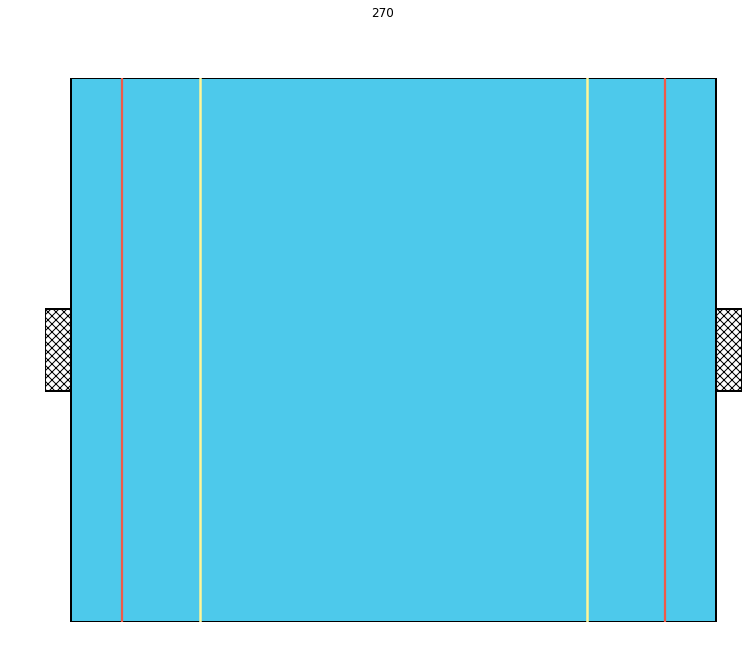

In [12]:
fun('20180127_CHNvSTAN','10','both')

In [ ]:
#Function name: path
#Input: game_code -- date and teams of the game
#       clip -- clip number from game video
#Output: a video that contains trajectories of players, ball, and goalie.

In [ ]:
def path(game_code,clip):
    #create a folder to save the video
    final_directory = os.path.join('/Users/youyangzhang/Desktop/wp_data/video_with_track/{:s}'.format(game_code))
    if not os.path.exists(final_directory):
        os.makedirs(final_directory)
    
    video = cv2.VideoCapture("/Users/youyangzhang/Desktop/wp_data/frames_box/{:s}/clip_{:s}.avi".format(game_code,clip))
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('/Users/youyangzhang/Desktop/wp_data/video_with_track/{:s}/clip_{:s}.avi'.format(game_code,clip), fourcc, 5, (1920,1080))
    jsonfile = '/Users/youyangzhang/Desktop/wp_data/composite_jsons/{}/clip_{}.json'.format(game_code,clip)
    with open(jsonfile, 'r') as f:
        game_data = json.load(f)
    
    length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    colors = [(0,0,0),(255,255,255),(0,0,255),(0,255,255)]
    for i in range(2,length + 1):
        ret,frame = video.read()
        for k,color in zip(game_data['tracks'].keys(),colors):
            for tr in game_data['tracks'][k]:
                if not tr['outside'][i-1]:
                    for a in range(2,i+1):
                        frame = cv2.line(frame,(tr['x_im'][a-1],tr['y_im'][a-1]),(tr['x_im'][a-2],tr['y_im'][a-2]),color,3)
        out.write(frame)
    video.release()
    out.release()
    cv2.destroyAllWindows()
